In [31]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer as imputer
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report


from termcolor import colored
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 300)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("smoking_drinking.csv")
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.000,1.000,1.000,1.000,1.000,120.000,80.000,99.000,193.000,48.000,126.000,92.000,17.100,1.000,1.000,21.000,35.000,40.000,1.000,Y
1,Male,30,180,80,89.000,0.900,1.200,1.000,1.000,130.000,82.000,106.000,228.000,55.000,148.000,121.000,15.800,1.000,0.900,20.000,36.000,27.000,3.000,N
2,Male,40,165,75,91.000,1.200,1.500,1.000,1.000,120.000,70.000,98.000,136.000,41.000,74.000,104.000,15.800,1.000,0.900,47.000,32.000,68.000,1.000,N
3,Male,50,175,80,91.000,1.500,1.200,1.000,1.000,145.000,87.000,95.000,201.000,76.000,104.000,106.000,17.600,1.000,1.100,29.000,34.000,18.000,1.000,N
4,Male,50,165,60,80.000,1.000,1.200,1.000,1.000,138.000,82.000,101.000,199.000,61.000,117.000,104.000,13.800,1.000,0.800,19.000,12.000,25.000,1.000,N


In [3]:
df.columns = df.columns.map(str.lower)
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'sbp', 'dbp', 'blds', 'tot_chole', 'hdl_chole', 'ldl_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'sgot_ast', 'sgot_alt', 'gamma_gtp', 'smk_stat_type_cd',
       'drk_yn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   sbp               991346 non-null  float64
 10  dbp               991346 non-null  float64
 11  blds              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  hdl_chole         991346 non-null  float64
 14  ldl_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [5]:
df["drk_yn"] = np.where(df["drk_yn"] == "Y", 1, 0)
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,sbp,dbp,blds,tot_chole,hdl_chole,ldl_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,sgot_ast,sgot_alt,gamma_gtp,smk_stat_type_cd,drk_yn
0,Male,35,170,75,90.000,1.000,1.000,1.000,1.000,120.000,80.000,99.000,193.000,48.000,126.000,92.000,17.100,1.000,1.000,21.000,35.000,40.000,1.000,1
1,Male,30,180,80,89.000,0.900,1.200,1.000,1.000,130.000,82.000,106.000,228.000,55.000,148.000,121.000,15.800,1.000,0.900,20.000,36.000,27.000,3.000,0
2,Male,40,165,75,91.000,1.200,1.500,1.000,1.000,120.000,70.000,98.000,136.000,41.000,74.000,104.000,15.800,1.000,0.900,47.000,32.000,68.000,1.000,0
3,Male,50,175,80,91.000,1.500,1.200,1.000,1.000,145.000,87.000,95.000,201.000,76.000,104.000,106.000,17.600,1.000,1.100,29.000,34.000,18.000,1.000,0
4,Male,50,165,60,80.000,1.000,1.200,1.000,1.000,138.000,82.000,101.000,199.000,61.000,117.000,104.000,13.800,1.000,0.800,19.000,12.000,25.000,1.000,0


In [6]:
TARGET = "drk_yn"

In [7]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
sbp                 0
dbp                 0
blds                0
tot_chole           0
hdl_chole           0
ldl_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
sgot_ast            0
sgot_alt            0
gamma_gtp           0
smk_stat_type_cd    0
drk_yn              0
dtype: int64

In [8]:
def duplicated_rows(dataframe, head=5, report=True, dup_idx=False, drop_dup=False):
    if report:
        df_dup = df[df.duplicated()]
        print(f"Number of Duplicated Rows: {df_dup.shape[0]}\n")
        print(f"Duplicated first {head} Rows:")
        display(df_dup.head(head))
    
    if dup_idx:
        return df_dup.index

    if drop_dup:
        dataframe = dataframe.drop(df_dup.index, axis=0)
        return dataframe
    
duplicated_rows(df)

Number of Duplicated Rows: 26

Duplicated first 5 Rows:


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,sbp,dbp,blds,tot_chole,hdl_chole,ldl_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,sgot_ast,sgot_alt,gamma_gtp,smk_stat_type_cd,drk_yn
159911,Female,40,170,85,88.000,0.900,0.900,1.000,1.000,120.000,70.000,110.000,191.000,47.000,121.000,115.000,10.400,1.000,0.900,17.000,14.000,33.000,1.000,0
175152,Male,65,170,75,101.100,0.600,0.700,1.000,1.000,130.000,70.000,114.000,175.000,38.000,109.000,140.000,17.100,1.000,1.000,24.000,31.000,26.000,3.000,0
246305,Female,50,155,70,90.800,1.000,1.000,1.000,1.000,150.000,96.000,101.000,230.000,43.000,150.000,183.000,14.900,1.000,0.800,24.000,22.000,42.000,1.000,0
280830,Male,45,170,75,86.400,1.200,0.700,1.000,1.000,150.000,78.000,195.000,222.000,55.000,122.000,499.000,14.900,1.000,0.800,23.000,11.000,342.000,3.000,1
284528,Female,65,150,55,86.000,0.900,0.900,1.000,1.000,120.000,65.000,99.000,228.000,62.000,139.000,136.000,11.900,1.000,0.700,27.000,18.000,14.000,1.000,0


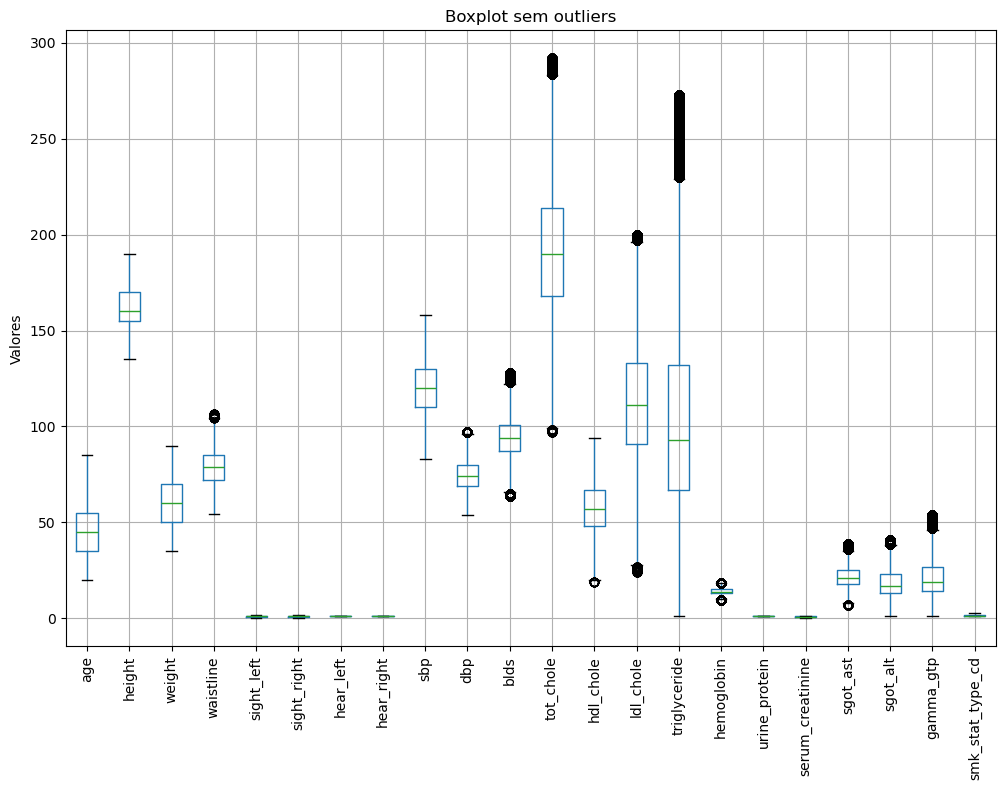

In [9]:
def remove_outliers(df):
    df = df.copy()
    
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

def plot_boxplot(df):

    df.select_dtypes(include=['float64', 'int64']).boxplot(figsize=(12, 8))
    plt.xticks(rotation=90)  
    plt.title("Boxplot sem outliers")
    plt.ylabel("Valores")
    plt.show()
    
df = remove_outliers(df)
plot_boxplot(df)

In [10]:
#Encodando colunas OBJECT
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])

In [12]:
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [13]:
#Criando coluna BMI (Weight/Height)

df['bmi'] = df['weight'] / (df['height'] ** 2)

In [17]:
#Criando coluna com cálculos BP_ratio

df['bp_ratio'] = df['sbp'] / df['dbp']

In [18]:
#Criando coluna Cholesterol Ratios

df['hdl_ratio'] = df['hdl_chole'] / df['tot_chole']
df['ldl_ratio'] = df['ldl_chole'] / df['tot_chole']

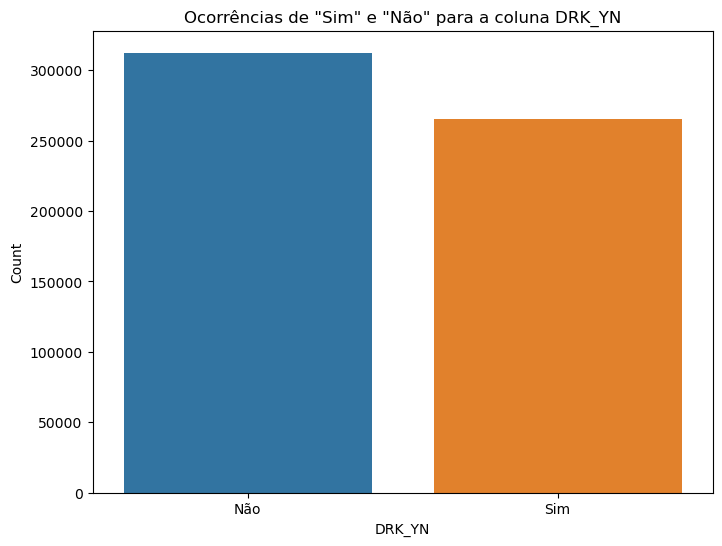

In [20]:
count=df['drk_yn'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=count.index, y=count.values)
plt.title('Ocorrências de "Sim" e "Não" para a coluna DRK_YN')
plt.xlabel('DRK_YN')
plt.ylabel('Count')
plt.xticks(count.index, ["Não", "Sim"])
plt.show()

In [21]:
df['age_group'] = label_encoder.fit_transform(df['age_group'])

In [22]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,sbp,dbp,blds,tot_chole,hdl_chole,ldl_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,sgot_ast,sgot_alt,gamma_gtp,smk_stat_type_cd,drk_yn,age_group,bmi,bp_ratio,hdl_ratio,ldl_ratio
0,1,35,170,75,90.000,1.000,1.000,1.000,1.000,120.000,80.000,99.000,193.000,48.000,126.000,92.000,17.100,1.000,1.000,21.000,35.000,40.000,1.000,1,1,0.003,1.500,0.249,0.653
1,1,30,180,80,89.000,0.900,1.200,1.000,1.000,130.000,82.000,106.000,228.000,55.000,148.000,121.000,15.800,1.000,0.900,20.000,36.000,27.000,3.000,0,1,0.002,1.585,0.241,0.649
3,1,50,175,80,91.000,1.500,1.200,1.000,1.000,145.000,87.000,95.000,201.000,76.000,104.000,106.000,17.600,1.000,1.100,29.000,34.000,18.000,1.000,0,3,0.003,1.667,0.378,0.517
4,1,50,165,60,80.000,1.000,1.200,1.000,1.000,138.000,82.000,101.000,199.000,61.000,117.000,104.000,13.800,1.000,0.800,19.000,12.000,25.000,1.000,0,3,0.002,1.683,0.307,0.588
6,0,45,150,55,69.000,0.500,0.400,1.000,1.000,101.000,58.000,89.000,196.000,66.000,115.000,75.000,12.300,1.000,0.800,19.000,12.000,12.000,1.000,0,2,0.002,1.741,0.337,0.587


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577958 entries, 0 to 991344
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               577958 non-null  int32  
 1   age               577958 non-null  int64  
 2   height            577958 non-null  int64  
 3   weight            577958 non-null  int64  
 4   waistline         577958 non-null  float64
 5   sight_left        577958 non-null  float64
 6   sight_right       577958 non-null  float64
 7   hear_left         577958 non-null  float64
 8   hear_right        577958 non-null  float64
 9   sbp               577958 non-null  float64
 10  dbp               577958 non-null  float64
 11  blds              577958 non-null  float64
 12  tot_chole         577958 non-null  float64
 13  hdl_chole         577958 non-null  float64
 14  ldl_chole         577958 non-null  float64
 15  triglyceride      577958 non-null  float64
 16  hemoglobin        57

In [24]:
features = ['sex', 'age_group', 'bmi', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right',
            'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'sgot_ast', 'sgot_alt', 'gamma_gtp',
            'smk_stat_type_cd', 'drk_yn', 'bp_ratio', 'hdl_ratio', 'ldl_ratio']

In [25]:
df_selected = df[features]

In [32]:
# Definir variável alvo (target) e variáveis preditoras (features)
X = df_selected.drop('drk_yn', axis=1)  # Variáveis preditoras
y = df_selected['drk_yn']  # Variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.dropna()
y_train = y_train[X_train.index] 

imputer_instance = imputer() 

X_train = imputer_instance.fit_transform(X_train) 
X_test = imputer_instance.transform(X_test)

# Continue with model training:
model = LogisticRegression(max_iter=1500)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Matriz de Confusão:
[[47581 15016]
 [18888 34107]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74     62597
           1       0.69      0.64      0.67     52995

    accuracy                           0.71    115592
   macro avg       0.71      0.70      0.70    115592
weighted avg       0.71      0.71      0.71    115592



In [33]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [34]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577958 entries, 0 to 991344
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               577958 non-null  int32  
 1   age_group         577958 non-null  int32  
 2   bmi               577958 non-null  float64
 3   waistline         577958 non-null  float64
 4   sight_left        577958 non-null  float64
 5   sight_right       577958 non-null  float64
 6   hear_left         577958 non-null  float64
 7   hear_right        577958 non-null  float64
 8   triglyceride      577958 non-null  float64
 9   hemoglobin        577958 non-null  float64
 10  urine_protein     577958 non-null  float64
 11  serum_creatinine  577958 non-null  float64
 12  sgot_ast          577958 non-null  float64
 13  sgot_alt          577958 non-null  float64
 14  gamma_gtp         577958 non-null  float64
 15  smk_stat_type_cd  577958 non-null  float64
 16  drk_yn            57

In [35]:
df_selected.head()

,sex,age_group,bmi,waistline,sight_left,sight_right,hear_left,hear_right,triglyceride,hemoglobin,urine_protein,serum_creatinine,sgot_ast,sgot_alt,gamma_gtp,smk_stat_type_cd,drk_yn,bp_ratio,hdl_ratio,ldl_ratio
0,1,1,0.003,90.000,1.000,1.000,1.000,1.000,92.000,17.100,1.000,1.000,21.000,35.000,40.000,1.000,1,1.500,0.249,0.653
1,1,1,0.002,89.000,0.900,1.200,1.000,1.000,121.000,15.800,1.000,0.900,20.000,36.000,27.000,3.000,0,1.585,0.241,0.649
3,1,3,0.003,91.000,1.500,1.200,1.000,1.000,106.000,17.600,1.000,1.100,29.000,34.000,18.000,1.000,0,1.667,0.378,0.517
4,1,3,0.002,80.000,1.000,1.200,1.000,1.000,104.000,13.800,1.000,0.800,19.000,12.000,25.000,1.000,0,1.683,0.307,0.588
6,0,2,0.002,69.000,0.500,0.400,1.000,1.000,75.000,12.300,1.000,0.800,19.000,12.000,12.000,1.000,0,1.741,0.337,0.587


In [47]:
exemplo = pd.DataFrame({
    'sex': [1],
    'age_group': [3],
    'bmi': [0.003], 
    'waistline': [91.000],
    'sight_left': [1.000],
    'sight_right': [0.400],
    'hear_left': [1.000],
    'hear_right': [1.000],
    'triglyceride': [115.000],
    'hemoglobin': [16.000],
    'urine_protein': [1.000],
    'serum_creatinine': [0.700],
    'sgot_ast': [29.000],
    'sgot_alt': [34.000],
    'gamma_gtp': [40.000],
    'smk_stat_type_cd': [3.000],
    'bp_ratio': [1.766],
    'hdl_ratio': [0.378],
    'ldl_ratio': [0.653]
})


In [48]:
prediction = model.predict(exemplo)

In [49]:
print("Prediction:", prediction)

Prediction: [1]
